In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
plt.style.use('ggplot')

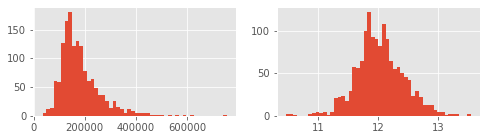

In [33]:
dataset = pd.read_csv('data/train.csv', sep=',')
#print(dataset.describe())
sale_price = dataset['SalePrice']
sale_price_log = np.log(dataset['SalePrice'])

plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.hist(sale_price, bins=50)
plt.subplot(1,2,2)
plt.hist(sale_price_log, bins=50)

def return_nan_number(series):
    print(f'Num of Not a Number: {series.isnull().sum()}')

In [34]:
num_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch',
                'PoolArea', 'MiscVal']

num_cols = ['SalePrice', 'LotArea']
for x in num_cols:
    raw = dataset[x].values
    log = np.log(dataset[x].values)
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    plt.hist(raw, bins=50)
    plt.title(x)
    plt.subplot(1,2,2)
    plt.hist(log, bins=50)
    plt.title(x + '-log scale')

ValueError: num must be 1 <= num <= 2, not 3

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Num of Not a Number: 0
4    1151
3     218
2      65
1      16
0      10
Name: MSZoning, dtype: int64


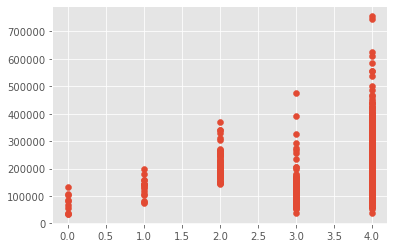

In [4]:
MSZoning = dataset['MSZoning']
print(MSZoning.value_counts())
return_nan_number(MSZoning)
MSZoning =  dataset['MSZoning'].map({'RL': 4, 'RM': 3, 'FV': 2, 'RH': 1, 'C (all)': 0})
print(MSZoning.value_counts())
plt.scatter(MSZoning, sale_price)

Num of Not a Number: 0
1    1454
0       6
Name: Street_Pave, dtype: int64


(array([   6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1454.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

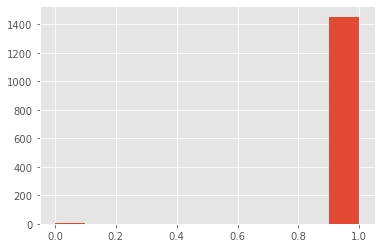

In [5]:
Street = dataset['Street']
return_nan_number(Street)
Street = pd.get_dummies(dataset, columns=['Street'], drop_first=True).loc[:,'Street_Pave']
print(Street.value_counts())
plt.hist(Street)

In [16]:
Alley = dataset['Alley']
print(Alley.value_counts())
return_nan_number(Alley)
print(Alley.value_counts())

Alley = Alley.map({'Grvl':2, 'Pave':1, np.nan:0})
plt.hist(Alley)

Grvl    50
Pave    41
Name: Alley, dtype: int64
Num of Not a Number: 1369
Grvl    50
Pave    41
Name: Alley, dtype: int64
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

 

In [7]:
LotShape = dataset['LotShape']
return_nan_number(LotShape)
print(LotShape.value_counts())

Num of Not a Number: 0
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


In [17]:

print(pd.get_dummies(dataset, columns=['Alley', 'MasVnrType'], drop_first=False))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl   